<a href="https://colab.research.google.com/github/ZTatman/Artificial-Intelligence/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

## Problem 1


#### Generate Random Data Set with Two Features

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 

# Sample Values 
m = 200
mu = 30
sigma = 20
b =  0.5


# generate random weights for two features
w = np.random.rand(m, 1)


# Returns array of shape (m, 2) of random data (2 features)
def get_random_data(w, b, mu, sigma, m):
  labels = np.array([])
  x_2 = list()
  x_1 = list()

  # Generate a random n, c, and x_2 with weights
  for i in range(m):
    c = np.random.choice(2, p=[0.5, 0.5])
    ft_1 = np.random.uniform(0,1)
    n = np.random.default_rng().normal(mu, sigma)
    labels = np.insert(labels, i, c, axis=0)
    x_2.append(w[i] * ft_1 + b + (-1)**c * n)
    x_1.append(ft_1)

  # Combine x_1 and x_2 into (m, 2) array
  x_2 = np.asarray(x_2)
  x_1 = np.asarray(x_1)
  data = np.column_stack((x_1, x_2))
  labels = labels.reshape(m,1)  
  return data, labels, (mu, sigma, m);


# Generate random data and labels
data, labels, dist = get_random_data(w, b, mu, sigma, m)



####  Function that Plots Randomly Generated Dataset

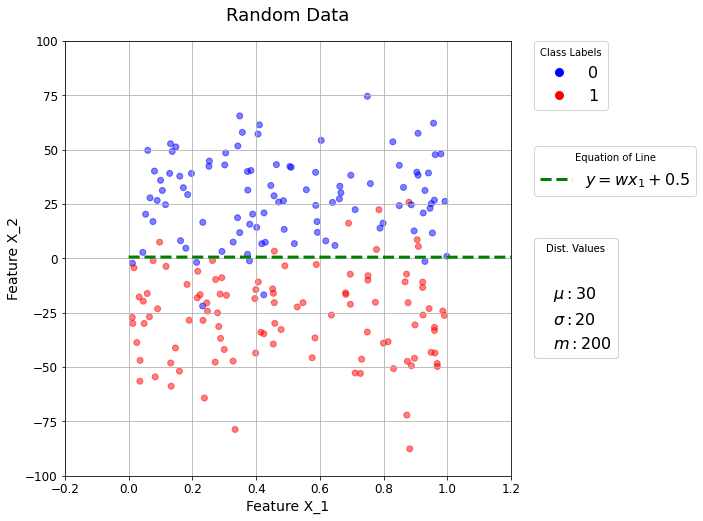

In [724]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.markers as mk
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np 

def display_random_data(labels, data, dist):
  # Unpack distribution values
  (mu, sigma, m) = dist

  # Format plot 
  mpl.rc('axes', labelsize=14)
  mpl.rc('xtick', labelsize=12)
  mpl.rc('ytick', labelsize=12)
  fig,ax = plt.subplots(figsize=(8,8))
  ax.set_ylim((-100,100))
  ax.set_xlim((-.2,1.2))
  ax.set_title('Random Data', pad=20, size=18) 
  ax.set_ylabel('Feature X_2')
  ax.set_xlabel('Feature X_1')

  # Create external color map
  # colors = np.array(['blue', 'red'])
  cmap_label = np.array(labels.reshape(len(data),), dtype=int)
  cmap_label = cmap_label.tolist()
  color = ['red' if l == 1 else 'blue' for l in cmap_label]

  # Create scatter plot and Equation of line
  y = w[:len(data)] * data[:, :1] + b
  ax.plot(y, '--', c='green', linewidth=3, label=r'$y = wx_1 + {}$'.format(b))
  scatter = ax.scatter(data[:,0], data[:,1], c = color, alpha=0.5)

  # Legends 
  class_0 = Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='b', markersize=10)
  class_1 = Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='r', markersize=10)
  leg1 = ax.legend(handles=[class_0, class_1], title="Class Labels", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, borderaxespad=0.)
  leg2 = ax.legend(title="Equation of Line", bbox_to_anchor=(1.05, .7), loc='center left', fontsize=16, borderaxespad=0.)
  dist = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


  # Distribution Data Handles
  mu_patch = mpatches.Patch(color="white", fill=False, label=r"$\mu: $" + f"{mu}")
  sigma_patch = mpatches.Patch(color="white", fill=False, label=r"$\sigma: $" + f"{sigma}")
  m_patch = mpatches.Patch(color="white", fill=False, label=r"$m: $" + f"{m}")

  leg3 = ax.legend(handles=[dist, mu_patch, sigma_patch, m_patch], title="Dist. Values", bbox_to_anchor=(1.05, .27), handlelength=0, loc='lower left', fontsize=16, borderaxespad=0.)
  ax.add_artist(leg1)
  ax.add_artist(leg2)
  ax.add_artist(leg3)
  ax.grid(True)
  plt.show()

# Plot the random data
display_random_data(labels, data, dist)

In [725]:
print

<function print>

#### Split Data into Test and Validation Sets

In [726]:
# Training Set
print('Training Set\n------------')
train_data = data[:160]
print(train_data.shape)
train_labels = labels[:160]
print(train_labels.shape)

# Validation Set
print('Validation Set\n--------------')
val_data = data[160:]
print(val_data.shape)
val_labels = labels[160:]
print(val_labels.shape)

Training Set
------------
(160, 2)
(160, 1)
Validation Set
--------------
(40, 2)
(40, 1)


## Problem 2

#### Keras Model Implementing Logistic Regression with Two Features

#### Create Model Definition


In [0]:
%matplotlib inline
%tensorflow_version 2.x
import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers

# Sequential Model
network = models.Sequential()
# Input Layer
network.add(layers.Dense(2, activation='relu', input_shape=(2,)))
# Output Layer
network.add(layers.Dense(1, activation='sigmoid'))


#### Compile The Model

In [0]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### Train Model

In [729]:
history = network.fit(train_data, train_labels, epochs=10, batch_size=20, validation_data=(val_data, val_labels))

Epoch 1/10
8/8 [==============================] - 0s 12ms/step - loss: 9.7953 - accuracy: 0.0812 - val_loss: 10.0271 - val_accuracy: 0.0250
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 9.3119 - accuracy: 0.0812 - val_loss: 9.5874 - val_accuracy: 0.0250
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 8.9268 - accuracy: 0.0812 - val_loss: 9.2091 - val_accuracy: 0.0250
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 8.5688 - accuracy: 0.0812 - val_loss: 8.8325 - val_accuracy: 0.0250
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 8.2210 - accuracy: 0.0812 - val_loss: 8.4727 - val_accuracy: 0.0250
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 7.8761 - accuracy: 0.0812 - val_loss: 8.1077 - val_accuracy: 0.0250
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 7.5453 - accuracy: 0.0812 - val_loss: 7.7669 - val_accuracy: 0.0250
Epoch 8/10
8/8 [================

#### Plot of Training and Validation Loss and Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



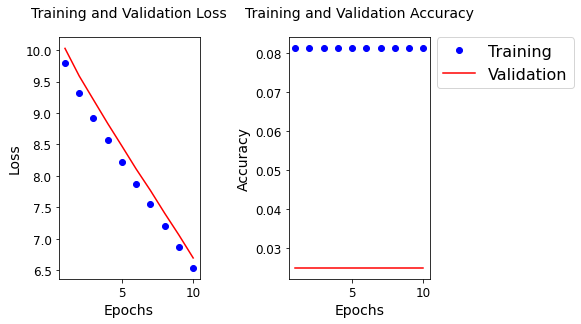

In [730]:
%matplotlib inline
import matplotlib.pyplot as plt


# Extract Models History
hist = history.history
print(hist.keys())
print()

# Extract Loss Values
train_loss = hist['loss']
val_loss = hist['val_loss']

# Extract Accuracy Values
train_acc = hist['accuracy']
val_acc = hist['val_accuracy']

# Create Figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
epochs = range(1, len(train_loss) + 1)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(w_pad=5.0)

# Plot Training Loss v. Validation Loss
ax1.plot(epochs, train_loss, 'bo', label='Training Loss')
ax1.plot(epochs, val_loss, 'r', label='Validation Loss')
ax1.set_title('Training and Validation Loss', pad=20, size=14)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

# Plot Training Accuracy v. Validation Accuracy
ax2.plot(epochs, train_acc, 'bo', label='Training')
ax2.plot(epochs, val_acc, 'r', label='Validation')
ax2.set_title('Training and Validation Accuracy', pad=20, size=14)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, borderaxespad=0.)
plt.show()
print('\n\n')

#### Extract Model Weights


In [731]:
# Get the weights from the model
model_w, model_b = network.layers[1].get_weights()

model_w = np.asarray(model_w)
print('Weights: \n', model_w)
print()

model_b = np.asarray(model_b)
print('Biases: \n', model_b)
print()

Weights: 
 [[-1.0191439]
 [ 1.0727632]]

Biases: 
 [-0.07204185]



#### Find Equation of the Seperated Line

The dot product summation for two features looks like this:  
**$\sum_{i=1}^n (w_{1n}x_{1n} + w_{2n}x_{2n} + b)$**  where n is the number of data points.
<br>
<br>
It almost looks like the **standard equation of a line: Ax + By = C**, so I will write my features equation in standard form: **$0 = w_1x_1 + w_2x_2 + b$**
<br>
<br>
In my previous plots, $x_2$ serves as my $y$ and $x_1$ serves as my $x$, I will rewrite the equation to match that logic:
<br>
**$0 = w_1x + w_2y + b$**


#### Find X and Y Intercepts
Now that I have something I can work with, I will find the **$x$ and $y$ intercepts** and then use those points to find the slope of the seperated line.



#### X Intercept (y = 0)
**$0 = w_1x + w_2(0) + b$**
<br>
**$0 = w_1x + b$**
<br>
**$-b = w_1x$**
<br>
**$x = \frac{-b}{w_1}$**
<br>
**$X-intercept = (\frac{-b}{w_1},0)$**

In [0]:
x_i = -(model_b) / model_w[:1]

#### Y Intercept (x = 0)
**$0 = w_1(0) + w_2y + b$**
<br>
**$0 = w_2y + b$**
<br>
**$-b = w_2y$**
<br>
**$y = \frac{-b}{w_2}$**
<br>
**$Y-intercept = (0,\frac{-b}{w_2})$**

In [0]:
y_i = -(model_b) / model_w[1:2]

#### Slope (m)
**$m = \frac{y_2 - y_1}{x_2 - x_1}$**
<br>
<br>
**$ m = \frac{\frac{-b}{w_2} - 0}{0 - (\frac{-b}{w_1})}$**
<br>
<br>
**$ m = \frac{\frac{-b}{w_2}}{\frac{b}{w_1}}$**
<br>
<br>
**$ m = \frac{-w_1}{w_2}$**

In [0]:
slope = -(model_w[:1]) / model_w[1:2]

#### Seperation Line

**$y = slope * x  + Y-intercept$**
<br>
<br>
Lets plug in the values that we found into the equation:
<br>
**$y =  (\frac{-w_1}{w_2})x  + (\frac{-b}{w_2})$**
<br>
**$y =  (\frac{0.9085247}{-1.3844049})x  + (\frac{-0.38965237}{-1.3844049})$**
<br>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


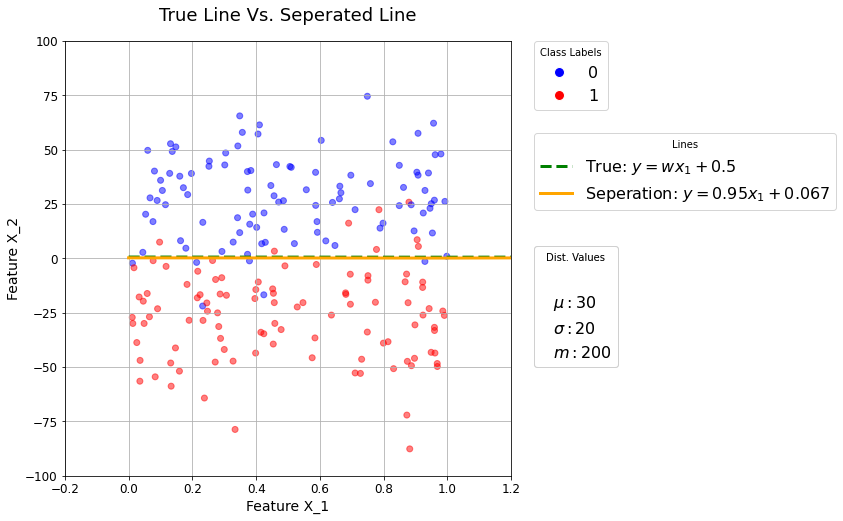

In [735]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Unpack Distribution Values
(mu, sigma, m) = dist


# Create Figure
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
fig,ax = plt.subplots(figsize=(8,8))
ax.set_ylim((-100,100))
ax.set_xlim((-.2,1.2))
ax.set_title('True Line Vs. Seperated Line', pad=20, size=18) 
ax.set_ylabel('Feature X_2')
ax.set_xlabel('Feature X_1')


# Create external color map
# colors = np.array(['blue', 'red'])
cmap_label = np.array(labels.reshape(len(data),), dtype=int)
cmap_label = cmap_label.tolist()
color = ['red' if l == 1 else 'blue' for l in cmap_label]

# The True Line
y_true_line = w * data[:, :1] + b
ax.plot(y_true_line, 'g--', linewidth=3, label=r'True: $y = wx_1 + {}$'.format(b))


# The Seperation Line
y_pred_line = slope * data[:, :1] + y_i
ax.plot( y_pred_line, '-', c='orange', linewidth=3, label=r'Seperation: $y = {}x_1 + {}$'.format(np.round(np.asscalar(slope), 3), np.round(np.asscalar(y_i), 3)))


# The Random Data Points
scatter = ax.scatter(data[:,0], data[:,1], c = color, alpha = .5)


# Create Legends 
class_0 = Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='b', markersize=10)
class_1 = Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='r', markersize=10)
leg1 = ax.legend(handles=[class_0, class_1], title="Class Labels", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, borderaxespad=0.)
leg2 = ax.legend(title="Lines", bbox_to_anchor=(1.05, .70), loc='center left', fontsize=16, borderaxespad=0.)
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


# Dist. Patch Labels
mu_patch = mpatches.Patch(color="white", fill=False, label=r"$\mu: $" + f"{mu}")
sigma_patch = mpatches.Patch(color="white", fill=False, label=r"$\sigma: $" + f"{sigma}")
m_patch = mpatches.Patch(color="white", fill=False, label=r"$m: $" + f"{m}")


# Adding Legends to plot
leg3 = ax.legend(handles=[extra, mu_patch, sigma_patch, m_patch], title="Dist. Values", bbox_to_anchor=(1.05, .25), handlelength=0, loc='lower left', fontsize=16, borderaxespad=0.)
ax.add_artist(leg1)
ax.add_artist(leg2)
ax.add_artist(leg3)
ax.grid(True)
plt.show()

#### Visualize the Function Using Confusion Matrix Heat Map 

[[73  6]
 [ 7 74]]


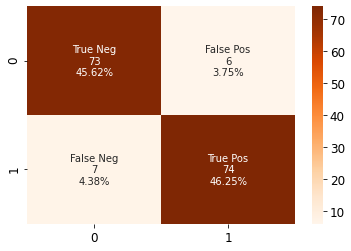

In [736]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Label Prediction Function
def model_predict(predict_data, W, b):
    preds = []
    for i in sigmoid(np.dot(predict_data, W) + b):
        if i<0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds


# Targets
targets = train_labels

# Predicted Labels
targets_pred = model_predict(train_data, model_w, model_b)
targets_pred = np.asarray(targets_pred).reshape((len(targets_pred), 1)).astype(float)

# Get the confusion matrix
cf_matrix = confusion_matrix(targets, targets_pred)
print(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
class_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
class_labels = np.asarray(class_labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=class_labels, fmt='', cmap='Oranges')
plt.show()




## Problem 3

#### Logistic Regression Numpy Implementation

#### Quick Review of the Random Data and HyperParameters

In [737]:
import matplotlib.pyplot as plt
import numpy as np


print(f"Mu: {mu}")
print()

print(f"Sigma: {sigma}")
print()

print(f"Bias: {b}")
print()

print(f"Weights: \t{w.shape}\n{w[:5]}")
print()

print(f"Train Data Set: \t{train_data.shape}\n{train_data[:5]}")
print()

print(f"Validation Data Set: \t{val_data.shape}\n{val_data[:5]}")
print()

print(f"Train Labels (Targets): \t{train_labels.shape}\n{train_labels[:5]}")
print()

print(f"Validation Labels (Targets): \t{val_labels.shape}\n{val_labels[:5]}")
print()

Mu: 30

Sigma: 20

Bias: 0.5

Weights: 	(200, 1)
[[0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]]

Train Data Set: 	(160, 2)
[[  0.17960368   4.67116661]
 [  0.06724963  27.82461978]
 [  0.45369684 -39.41453129]
 [  0.89667129 -45.96571033]
 [  0.21689698  -5.93069554]]

Validation Data Set: 	(40, 2)
[[  0.71033683  22.4054099 ]
 [  0.37267907  39.91910073]
 [  0.92211146 -13.38450443]
 [  0.40594232  57.19395618]
 [  0.34261098  51.6904031 ]]

Train Labels (Targets): 	(160, 1)
[[0.]
 [0.]
 [1.]
 [1.]
 [1.]]

Validation Labels (Targets): 	(40, 1)
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]



#### Sigmoid Activation Function 

Remember that $x_2$ acts as our y value in this  model.
<br>
<br>
The activation function is $a(z)$, where $z = \sum_{j = 1}^n(w_jx_j + b)$.
<br>
<br>
Then for each sample $y$ in the model we compute a prediction $y_{predict}$.  
$y_{predict} = a(z) => a(\sum_{j = 1}^nw_jx_j + b)$

In [0]:
def sigmoid(z):
  return (1 / (1 + np.exp(-z)))

#### Binary Crossentropy Loss Function



In [0]:
def cross_entropy_loss(y_predict,target):
    return -np.mean((target*np.log(y_predict)+(1-target)*np.log(1-y_predict)))

#### Choose Epochs and Learning Rate

In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

#### Generate $\hat{y}$ Predictions

In [0]:
# Label Prediction Function
def model_predict(predict_data, W, b):
    preds = []
    probs = []
    for i in sigmoid(np.dot(predict_data, W) + b):
        if i<0.5:
            preds.append(0)
        else:
            preds.append(1)
    return preds

In [0]:
np.random.seed(0)

# Generate 2 Random Weights for x_1 and x_2
W = np.random.uniform(0,1,size=(2,1))

# Dictionary of lists for accuracy and loss
history = {}
history.update( {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []} ) 

In [743]:
# Train Model On Training Data
for i in range(epochs):
    Z = np.dot(train_data, W) + b
    Y_hat = sigmoid(Z)
    train_loss = cross_entropy_loss(Y_hat, train_labels)
    history['loss'].append(np.round(train_loss, 5))
    grad= Y_hat - train_labels
    grad_weight= np.dot(train_data.T,grad)/train_data.shape[0]
    grad_bias = np.average(grad)
    W = W - lr*grad_weight
    b = b - lr*grad_bias

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [744]:
# Predict Labels for Training Data
train_pred = model_predict(train_data, W, b)
train_pred = np.asarray(train_pred).reshape((len(train_pred), 1)).astype(float)

# Validation Accuracy
acc = float(sum(train_pred == train_labels)) / float(len(train_data))
history['acc'].append(acc)
print('\nTraining Accuracy: ', acc)



Training Accuracy:  0.91875


#### Seperation Line of Numpy Implementation

In [0]:
# X intercept (Numpy Implementation)
x_i_np = -(b) / W[:1]

# Y intercept (Numpy Implementation)
y_i_np = -(b) / W[1:2]

# Slope
slope_np = - (W[:1]) / W[1:2]

#### Plot of numpy Model Trained on Training Split Data 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


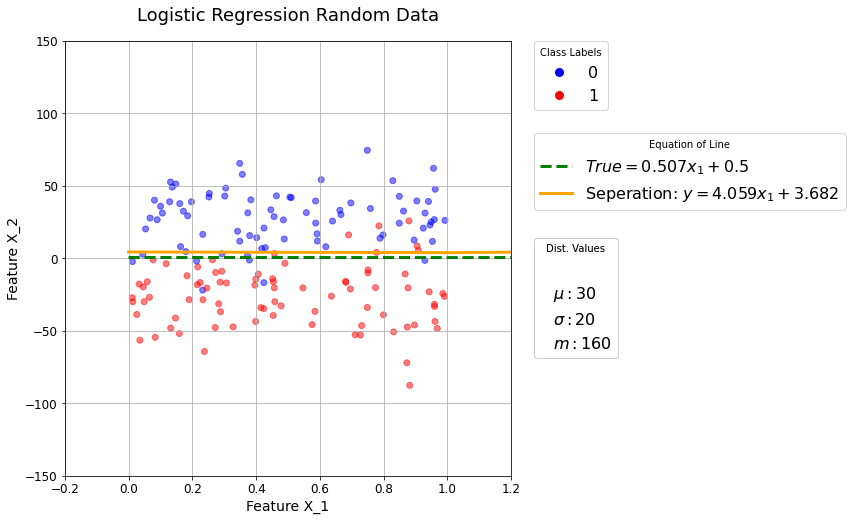

In [746]:
# Plot Random Data (Training Split)

  # Unpack distribution values
  (mu, sigma, m) = dist

  # Format plot 
  mpl.rc('axes', labelsize=14)
  mpl.rc('xtick', labelsize=12)
  mpl.rc('ytick', labelsize=12)
  fig,ax = plt.subplots(figsize=(8,8))
  ax.set_ylim((-150,150))
  ax.set_xlim((-.2,1.2))
  ax.set_title('Logistic Regression Random Data', pad=20, size=18) 
  ax.set_ylabel('Feature X_2')
  ax.set_xlabel('Feature X_1')

  # Create external color map
  cmap_label = np.array(train_labels.reshape(len(train_data),), dtype=int)
  cmap_label = cmap_label.tolist()
  color = ['red' if l == 1 else 'blue' for l in cmap_label]

  # True line
  w_train_avg = np.average(w[:len(train_data)]) 
  y_line_np = w[:len(train_data)] * train_data[:, :1] + b
  ax.plot(y_line_np, '--', c='green', linewidth=3, label=r'$True = {}x_1 + {}$'.format(np.round(w_train_avg, 3), np.round(b, 2)))

  # Prediction line
  y_pred_line_np = slope_np * train_data[:, :1] + y_i_np
  ax.plot( y_pred_line_np, '-', c='orange', linewidth=3, label=r'Seperation: $y = {}x_1 + {}$'.format(np.round(np.asscalar(slope_np), 3), np.round(np.asscalar(y_i_np), 3)))


  # Random Data
  scatter = ax.scatter(train_data[:,0], train_data[:,1], c = color, alpha=0.5)

  # Legends 
  class_0 = Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='b', markersize=10)
  class_1 = Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='r', markersize=10)
  leg1 = ax.legend(handles=[class_0, class_1], title="Class Labels", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, borderaxespad=0.)
  leg2 = ax.legend(title="Equation of Line", bbox_to_anchor=(1.05, .7), loc='center left', fontsize=16, borderaxespad=0.)
  extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
  
  # Dist. Patch Labels
  mu_patch = mpatches.Patch(color="white", fill=False, label=r"$\mu: $" + f"{mu}")
  sigma_patch = mpatches.Patch(color="white", fill=False, label=r"$\sigma: $" + f"{sigma}")
  m_patch = mpatches.Patch(color="white", fill=False, label=r"$m: $" + f"{len(train_data)}")

  leg3 = ax.legend(handles=[extra, mu_patch, sigma_patch, m_patch], title="Dist. Values", bbox_to_anchor=(1.05, .27), handlelength=0, loc='lower left', fontsize=16, borderaxespad=0.)
  ax.add_artist(leg1)
  ax.add_artist(leg2)
  ax.add_artist(leg3)
  ax.grid(True)
  plt.show()

#### Numpy Model Heat Map Visualization 

[[17  2]
 [ 1 20]]


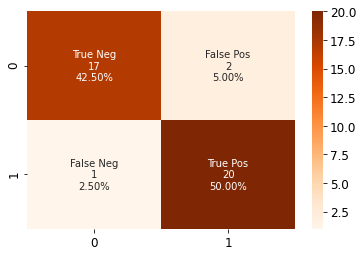

In [747]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Targets
targets = val_labels

# Predicted Labels
targets_pred = model_predict(val_data, W, b)
targets_pred = np.asarray(targets_pred).reshape((len(targets_pred), 1)).astype(float)

# Get the confusion matrix
cf_matrix = confusion_matrix(targets, targets_pred)
print(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
class_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
class_labels = np.asarray(class_labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=class_labels, fmt='', cmap='Oranges')
plt.show()

#### Loss and Accuracy on Validation Set

In [748]:
val_loss = 0
for i in np.arange(40):
  val_z = np.dot(val_data[i:i+1, :1], W[:1]) + b
  Y_test = sigmoid(val_z)
  temp_loss = 0.5 * (cross_entropy_loss(Y_test, val_labels[i])) ** 2
  val_loss += temp_loss
  # print('Val_loss sum ---------> ', val_loss)
val_loss /= 40
history['val_loss'].append(np.round(val_loss, 5))

print('val_loss history: \n', history['val_loss'])

val_loss history: 
 [0.36449]


In [749]:
from sklearn.metrics import accuracy_score

# Predict Labels for Validation Data
val_pred = model_predict(val_data, W, b)
val_pred = np.asarray(val_pred).reshape((len(val_pred), 1)).astype(float)

# Validation Accuracy (v_1)
val_acc_sk = accuracy_score(val_labels, val_pred)
print(f'sklearn Accuracy Score: {val_acc_sk}\n')

# Validation Accuracy (v_2)
val_acc = float(sum(val_pred == val_labels)) / float(len(val_data))
history['val_acc'].append(val_acc)
print('\nValidation Accuracy: ', val_acc)


sklearn Accuracy Score: 0.925


Validation Accuracy:  0.925
